In [1]:
#!/usr/local/bin/env python
from __future__ import division
import time
from copy import deepcopy
import numpy as np
from radd import build, fit, vis

## Prepare Data/Params

In [2]:
data = redf_store['redata']
binits = { k: v for k, v in redf_store['rebsl_boot_popt'].items() }
binits['ssv'] = -abs(binits['ssv'])
pinits = { k: v for k, v in redf_store['repnl_boot_popt'].items() }

avg_inits = { k: np.mean([binits[k], pinits[k]]) for k in binits.keys() }
if 'ssd' in avg_inits.keys(): del avg_inits['ssd']

##Reactive

In [3]:
dirpath = pth+'ELife/Fits/ReV_X'
if not os.path.isdir(dirpath):
      os.mkdir(dirpath)
os.chdir(dirpath)

data = redf_store['redata']
inits = dict(deepcopy(avg_inits))

In [4]:
m = build.Model(data=data, inits=inits, kind='radd', fit_on='average', depends_on={'v':'Cond'})


      Model is prepared to fit on average radd data, allowing
      Drift-Rate to vary across levels of Cond (bsl, pnl) 

      Optimize On, Wayne 


In [31]:
m.fitinfo

{'AIC': -240.56133754620635,
 'BIC': -237.6298657406069,
 'CNVRG': True,
 'a': 0.44232890865959967,
 'chi': 0.014388235051366365,
 'nfev': 82,
 'rchi': 0.00047960783504554552,
 'ssv': -0.92335837863804437,
 'tr': 0.30526123273655131,
 'v_bsl': 1.1078543506336136,
 'v_pnl': 1.0651278295613666,
 'z': 0.1541465820381083}

In [6]:
m.optimize(ntrials=10000, ftol=1.e-6, xtol=1.e-6, maxfev=5000)

Optimization terminated successfully.
         Current function value: 0.004991
         Iterations: 52
         Function evaluations: 149
Optimization terminated successfully.
         Current function value: 0.013407
         Iterations: 27
         Function evaluations: 71


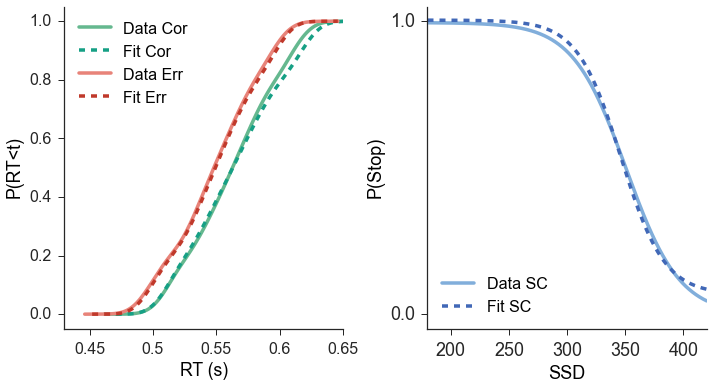

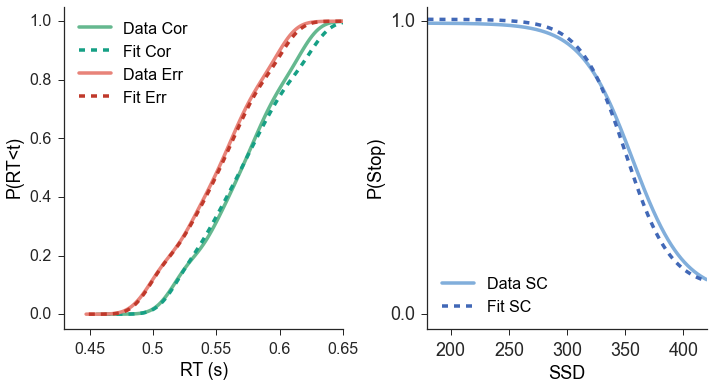

In [8]:
fits = m.fits.reshape(2, 16)
yhat = m.simulate()
for i in range(m.ncond):
      vis.plot_fits(m.avg_y[i], fits[i], plot_acc=True, save=False, savestr ='fits_'+m.labels[i])